In [2]:
import tensorflow as tf

In [3]:
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

In [4]:
# MNist 데이터셋 다운로드하고 데이터값 확인하기
(train_images, train_labels), (test_images, test_labels) = datasets.mnist.load_data()

In [5]:
train_images.shape

(60000, 28, 28)

Label: 5


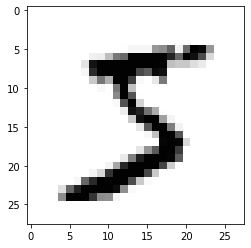

In [6]:
plt.imshow(train_images[0], cmap='Greys')
print('Label:', train_labels[0])

Label: 0


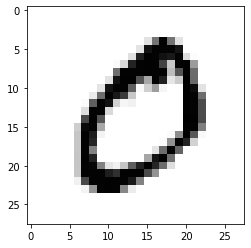

In [7]:
plt.imshow(train_images[1], cmap='Greys')
print('Label:', train_labels[1])

In [8]:
train_images[1]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,  51, 159, 253, 159,  50,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,  48, 238, 252, 252, 252, 237,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

Label: 0


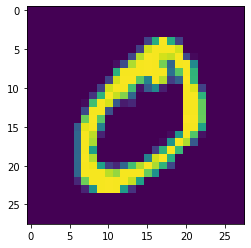

In [9]:
plt.imshow(train_images[1])
print('Label:', train_labels[1])

In [10]:
test_images.shape

(10000, 28, 28)

In [40]:
#전처리를 합시다
#학습용으로 차원을 reshape
#4차원으로 변경
train_images = train_images.reshape((60000,28,28,1))
test_images = test_images.reshape((10000,28,28,1))

In [41]:
#정규화 (Normalization) 픽셀값을 0~1 사이로 정규화합니다.
train_images, test_images = train_images/255.0, test_images/255.0

In [42]:
train_images[0]

array([[[0.00000000e+00],
        [0.00000000e+00],
        [0.00000000e+00],
        [0.00000000e+00],
        [0.00000000e+00],
        [0.00000000e+00],
        [0.00000000e+00],
        [0.00000000e+00],
        [0.00000000e+00],
        [0.00000000e+00],
        [0.00000000e+00],
        [0.00000000e+00],
        [0.00000000e+00],
        [0.00000000e+00],
        [0.00000000e+00],
        [0.00000000e+00],
        [0.00000000e+00],
        [0.00000000e+00],
        [0.00000000e+00],
        [0.00000000e+00],
        [0.00000000e+00],
        [0.00000000e+00],
        [0.00000000e+00],
        [0.00000000e+00],
        [0.00000000e+00],
        [0.00000000e+00],
        [0.00000000e+00],
        [0.00000000e+00]],

       [[0.00000000e+00],
        [0.00000000e+00],
        [0.00000000e+00],
        [0.00000000e+00],
        [0.00000000e+00],
        [0.00000000e+00],
        [0.00000000e+00],
        [0.00000000e+00],
        [0.00000000e+00],
        [0.00000000e+00],
        [0

In [43]:
#합성곱중 CNN 네트워크 만든다. CNN모델 만든다 똑같은말
model = models.Sequential(name='hj')
model.add(layers.Conv2D(20, (3,3), activation='relu', input_shape=(28,28,1)))
model.add(layers.MaxPool2D(2,2))
model.add(layers.Conv2D(20, (3,3), activation='relu'))
model.add(layers.MaxPool2D(2,2))
model.add(layers.Conv2D(128,(3,3), activation='relu'))

In [44]:
model.summary()

Model: "hj"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 26, 26, 20)        200       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 13, 13, 20)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 11, 11, 20)        3620      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 5, 5, 20)          0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 3, 3, 128)         23168     
Total params: 26,988
Trainable params: 26,988
Non-trainable params: 0
_________________________________________________________________


In [45]:
#마지막 레이어에 Dense중 추가하기
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
# 이부분 설계는 중요합니다. 바이너리, 멀티분류냐에 따라서 바뀌기 때문
model.add(layers.Dense(10, activation='softmax'))#열개의 노드에 확률을 주는데 그중 가장 높은 확률

In [46]:
model.summary()

Model: "hj"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 26, 26, 20)        200       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 13, 13, 20)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 11, 11, 20)        3620      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 5, 5, 20)          0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 3, 3, 128)         23168     
_________________________________________________________________
flatten_1 (Flatten)          (None, 1152)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 64)                73792    

In [47]:
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

In [48]:
model.fit(train_images, train_labels, epochs=7)

Train on 60000 samples
Epoch 1/7
60000/60000 [==============================] - 20s 333us/sample - loss: 0.9834 - accuracy: 0.6483
Epoch 2/7
60000/60000 [==============================] - 20s 328us/sample - loss: 0.2268 - accuracy: 0.9294
Epoch 3/7
60000/60000 [==============================] - 20s 340us/sample - loss: 0.1568 - accuracy: 0.9509
Epoch 4/7
60000/60000 [==============================] - 19s 319us/sample - loss: 0.1222 - accuracy: 0.9625
Epoch 5/7
60000/60000 [==============================] - 19s 317us/sample - loss: 0.1019 - accuracy: 0.9683
Epoch 6/7
60000/60000 [==============================] - 19s 313us/sample - loss: 0.0887 - accuracy: 0.9719
Epoch 7/7
60000/60000 [==============================] - 19s 315us/sample - loss: 0.0792 - accuracy: 0.9744


In [49]:
#모델을 예측해봅시다.
model.predict(train_images[[0]])

array([[6.47472348e-07, 6.56037126e-04, 4.43952595e-05, 7.33709335e-02,
        1.87093604e-10, 9.25831974e-01, 2.64292677e-09, 5.14843778e-05,
        3.27993512e-05, 1.18487815e-05]], dtype=float32)

In [50]:
import numpy as np

In [51]:
np.argmax(model.predict(train_images[[0]]))

5

label :  5


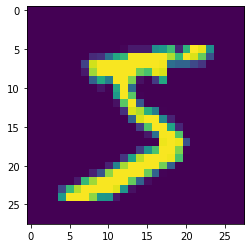

In [52]:
plt.imshow(train_images[0].reshape(28, 28))
print('label : ', train_labels[0])

In [53]:
#아직 학습하지 않은 1만장의 데이터가 남아있다.
test_images.shape

(10000, 28, 28, 1)

In [54]:
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)

10000/1 - 1s - loss: 0.0331 - accuracy: 0.9797


In [55]:
model.predict(test_images[[0]])

array([[3.6101247e-07, 2.3849319e-07, 5.3794040e-05, 5.0119663e-05,
        4.3036170e-09, 6.9275728e-08, 2.1374186e-15, 9.9983704e-01,
        6.3992729e-07, 5.7791447e-05]], dtype=float32)

In [56]:
np.argmax(model.predict(test_images[[0]]))

7

label :  7


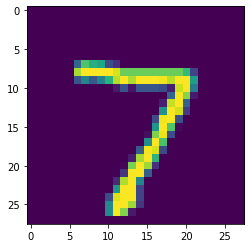

In [57]:
plt.imshow(test_images[0].reshape(28, 28))
print('label : ', test_labels[0])

In [58]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=7)

In [59]:
train_images.shape

(60000, 28, 28, 1)

In [60]:
#2차원으로 만들어줘야함
train_images = train_images.reshape(60000, 28*28)

In [61]:
train_images.shape

(60000, 784)

In [62]:
knn.fit(train_images, train_labels)

KNeighborsClassifier(n_neighbors=7)

In [63]:
test_images = test_images.reshape(10000, 28*28)

In [64]:
test_images.shape

(10000, 784)

In [65]:
knn.predict([test_images[0]])

array([7], dtype=uint8)

In [66]:
knn.score(test_images, test_labels)

0.9694